In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

This notebook contains the solution to this [exercise](https://github.com/codebasics/py/blob/master/ML/FeatureEngineering/2_outliers_z_score/Exercise/2_outliers_z_score_exercise.ipynb).

In [2]:
df = pd.read_csv("data/bhp/bhp.csv")

In [3]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [4]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

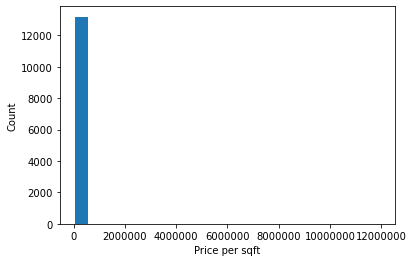

In [14]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per sqft')
plt.ylabel('Count')
plt.ticklabel_format(style='plain') 

In [15]:
df.price_per_sqft.mean()

7920.336742424242

In [16]:
df.price_per_sqft.std()

106727.16032810867

We use 3 standar deviations as our upper limit.

In [18]:
upper_limit = df.price_per_sqft.mean() + 3*df.price_per_sqft.std()
lower_limit = df.price_per_sqft.mean() - 3*df.price_per_sqft.std()

In [19]:
df_3_std = df[(df.price_per_sqft > lower_limit) & (df.price_per_sqft < upper_limit)]

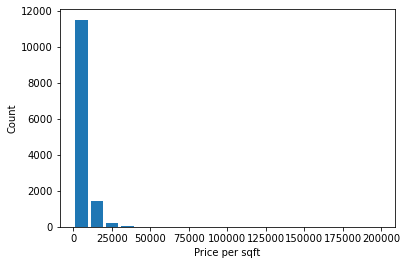

In [20]:
plt.hist(df_3_std.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per sqft')
plt.ylabel('Count')
plt.ticklabel_format(style='plain') 

In [21]:
df_3_std.shape

(13195, 7)

In [23]:
df[(df.price_per_sqft < lower_limit) | (df.price_per_sqft > upper_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


Z score indicates how many standard deviations away a point is.

$$Z = X - mean / std$$

## Exercise

In [26]:
# First, we remove the outliers using the percentile method
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
df_percentile_outlier_removal = df[(df.price_per_sqft > lower_limit) & (df.price_per_sqft < upper_limit)]

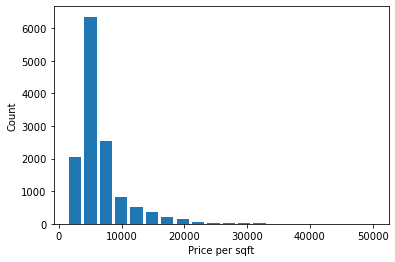

In [27]:
upper_limit = df.price_per_sqft.mean() + 4*df.price_per_sqft.std()
lower_limit = df.price_per_sqft.mean() - 4*df.price_per_sqft.std()

df_4_std = df_percentile_outlier_removal[(df_percentile_outlier_removal.price_per_sqft > lower_limit) & (df_percentile_outlier_removal.price_per_sqft < upper_limit)]

plt.hist(df_4_std.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per sqft')
plt.ylabel('Count')
plt.ticklabel_format(style='plain') 